# Лабораторная работа 3
## Барицентрическая форма полинома Лагранжа

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Узлы и значения функции в узлах интерполирования

In [55]:
x=[0,math.pi/6,math.pi/4,math.pi/3,math.pi/2]
y=[]
for i in range(5):
    y.append(math.cos(x[i]))

### Рассчет коэфициентов w и Ak 

In [56]:
w=[]
product=1
for i in range(5):
    for j in range(5):
        if(i!=j):
            product*=(x[i]-x[j])
    w.append(product)
    product=1

In [57]:
A=[]
for i in range(5):
    A.append(1/w[i])

### Коэффициенты Ak

In [58]:
print(A)

[1.4783014446745448, -13.304713002070901, 23.652823114792717, -13.304713002070905, 1.4783014446745442]


### Построение полинома

In [59]:
def Pn(X):
    num=0
    denom=0
    for i in range(5):
        num+=((A[i]*y[i])/(X-x[i]))
        denom+=(A[i]/(X-x[i]))
    return num/denom

### Сравнение результатов

In [60]:
xx=[math.pi/12, math.pi*5/12, math.pi*7/24]
yy=[]
yycos=[]
for i in range(3):
    yy.append(Pn(xx[i]))
    yycos.append(math.cos(xx[i]))

In [61]:
yy

[0.9661196634515765, 0.25858790872102827, 0.608785325608204]

In [62]:
yycos

[0.9659258262890683, 0.25881904510252074, 0.6087614290087207]

### Абсолютная погрешность интерполирования

In [63]:
delta=[]
for i in range(3):
    delta.append(abs(yycos[i]-yy[i]))

In [64]:
delta

[0.0001938371625082036, 0.0002311363814924694, 2.389659948331957e-05]

### Графики

C:\Users\FF34~1\AppData\Local\Temp/ipykernel_8156/2033467089.py:5: RuntimeWarning: divide by zero encountered in true_divide
  num+=((A[i]*y[i])/(X-x[i]))
C:\Users\FF34~1\AppData\Local\Temp/ipykernel_8156/2033467089.py:6: RuntimeWarning: divide by zero encountered in true_divide
  denom+=(A[i]/(X-x[i]))
C:\Users\FF34~1\AppData\Local\Temp/ipykernel_8156/2033467089.py:7: RuntimeWarning: invalid value encountered in true_divide
  return num/denom


<Figure size 2160x216 with 0 Axes>

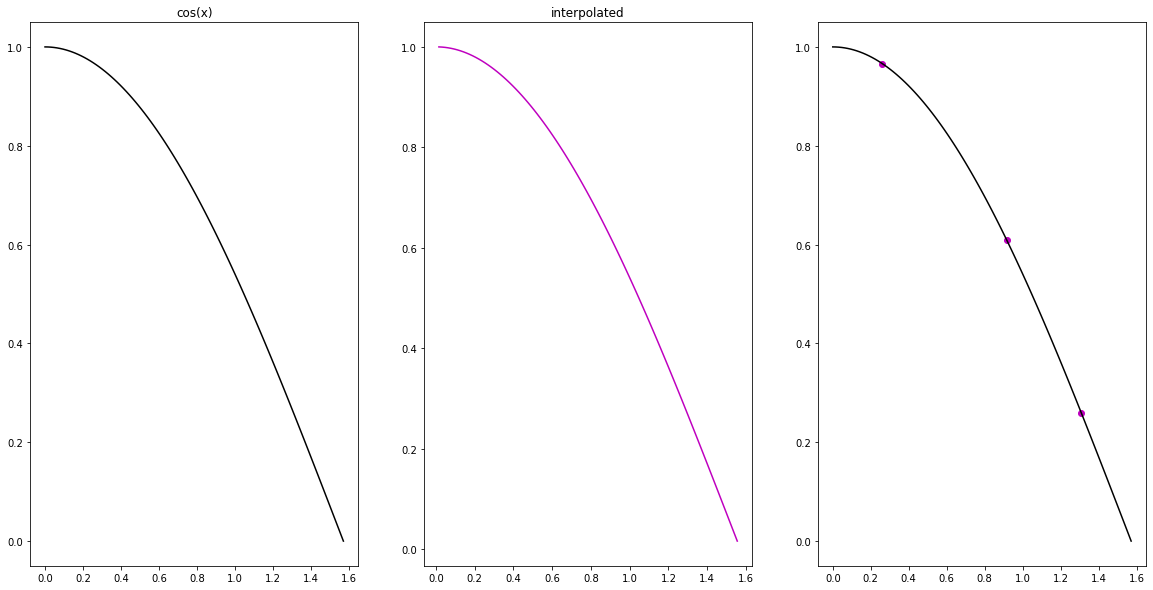

<Figure size 2160x216 with 0 Axes>

In [65]:
t=np.linspace(0,math.pi/2,100)
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.title("cos(x)")
plt.plot(t,np.cos(t),color='k')
plt.subplot(1,3,2)
plt.title("interpolated")
plt.plot(t,Pn(t),color='m')
plt.subplot(1,3,3)
x_x=np.array([math.pi/12, math.pi*5/12, math.pi*7/24])
plt.scatter(x_x,Pn(x_x),color='m')
plt.plot(t,np.cos(t),color='k')
plt.figure(figsize=(30, 3))

# Лабораторная работа 4

## Схема Эйткена

In [66]:
L1=[]
element=0
for i in range(4):
    element=(1/(x[i+1]-x[i]))*(y[i]*np.poly([x[i+1]])-y[i+1]*np.poly([x[i]]))
    L1.append(element)

In [67]:
for i in range(4):
    print(np.poly1d(L1[i]))

 
0.2559 x - 1
 
0.607 x - 1.184
 
0.7911 x - 1.328
 
0.9549 x - 1.5


In [68]:
L2=[]
element=0
for i in range(3):
    element=(1/(x[i+2]-x[i]))*np.polysub(np.polymul(L1[i],(-1)*np.poly([x[i+2]])),np.polymul(L1[i+1],(-1)*np.poly([x[i]])))
    L2.append(element)

In [69]:
for i in range(3):
    print(np.poly1d(L2[i]))

        2
0.4471 x + 0.02177 x - 1
        2
0.3515 x + 0.1469 x - 1.039
        2
0.2086 x + 0.4088 x - 1.157


In [70]:
L3=[]
element=0
for i in range(2):
    element=(1/(x[i+3]-x[i]))*np.polysub(np.polymul(L2[i],(-1)*np.poly([x[i+3]])),np.polymul(L2[i+1],(-1)*np.poly([x[i]])))
    L3.append(element)

In [71]:
for i in range(2):
    print(np.poly1d(L3[i]))

          3          2
-0.09125 x + 0.5666 x - 0.01576 x - 1
         3          2
-0.1365 x + 0.6731 x - 0.09636 x - 0.9805


In [72]:
L4=(1/(x[4]-x[0]))*np.polysub(np.polymul(L3[1],(-1)*np.poly([x[0]])),np.polymul(L3[0],(-1)*np.poly([x[4]])))

In [73]:
print(np.poly1d(L4))

        4          3          2
0.0288 x + 0.0234 x - 0.5152 x + 0.003354 x + 1


<Figure size 2160x216 with 0 Axes>

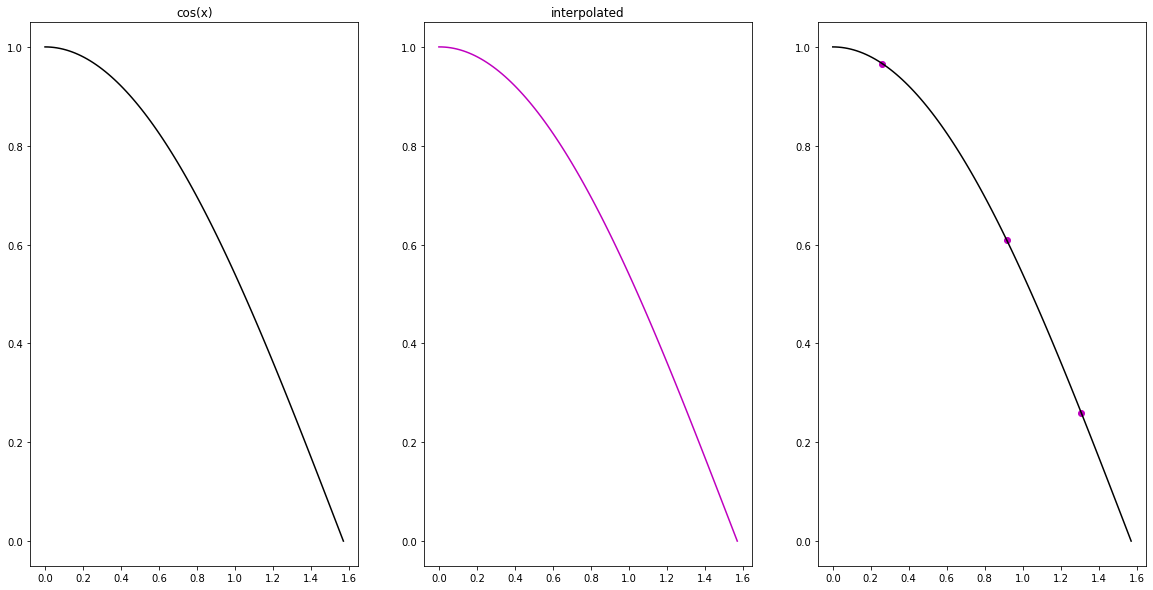

<Figure size 2160x216 with 0 Axes>

In [74]:
t=np.linspace(0,math.pi/2,100)
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.title("cos(x)")
plt.plot(t,np.cos(t),color='k')
plt.subplot(1,3,2)
plt.title("interpolated")
plt.plot(t,np.polyval(L4,t),color='m')
plt.subplot(1,3,3)
x_x=np.array([math.pi/12, math.pi*5/12, math.pi*7/24])
plt.scatter(x_x,np.polyval(L4,x_x),color='m')
plt.plot(t,np.cos(t),color='k')
plt.figure(figsize=(30, 3))

In [75]:
import pandas as pd

In [97]:
list=[x, y]
poly1=[]
poly1.append('-')
for i in range(4):
    poly1.append(str(np.poly1d(L1[i])))
    
poly2=[]
poly2.append('-')
poly2.append('-')
for i in range(3):
    poly2.append(str(np.poly1d(L2[i])))
    
poly3=[]
poly3.append('-')
poly3.append('-')
poly3.append('-')
for i in range(2):
    poly3.append(str(np.poly1d(L3[i])))
    
poly4=[]
poly4.append('-')
poly4.append('-')
poly4.append('-')
poly4.append('-')
poly4.append(str(np.poly1d(L4)))
data={'x':x, 'f(x)':y,'L1':poly1,'L2':poly2,'L3':poly3,'L4':poly4}
dataFrame=pd.DataFrame(data)

In [98]:
dataFrame

,x,f(x),L1,L2,L3,L4
0,0.000000,1.000000e+00,-,-,-,-
1,0.523599,8.660254e-01,\n0.2559 x - 1,-,-,-
2,0.785398,7.071068e-01,\n0.607 x - 1.184,2\n0.4471 x + 0.02177 x - 1,-,-
3,1.047198,5.000000e-01,\n0.7911 x - 1.328,2\n0.3515 x + 0.1469 x - 1.039,3 2\n-0.09125 x + 0.5666 x ...,-
4,1.570796,6.123234e-17,\n0.9549 x - 1.5,2\n0.2086 x + 0.4088 x - 1.157,3 2\n-0.1365 x + 0.6731 x - ...,4 3 2\n0.0288 x + 0....
